In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests

## Questão 5

Seja X_i uma v.a. uniforme [0,1]. Vamos calcular uma aproximação para e usando o valor esperado do numero de vezes necessário para que o somatório de X_i > 1, i = 1,...,n.

In [2]:
def compute_e(N):
    total = 0
    for i in range(N):
        sum_ = 0
        trials = 0
        while sum_ < 1:
            sum_ += np.random.uniform(0,1,1)
            trials += 1
        total += trials
    return total/N
N = 1000
compute_e(N)

2.734

In [3]:
y = []
for i in range(1,1001):
    y.append(compute_e(i))

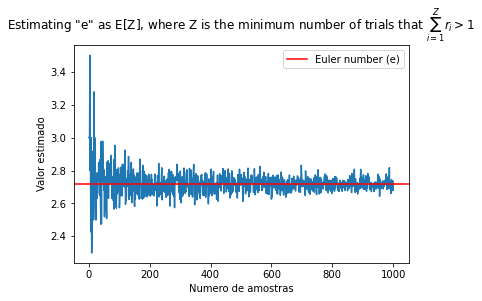

In [4]:
plt.plot(range(1,1001),y)
plt.xlabel("Numero de amostras")
plt.ylabel("Valor estimado")
plt.axhline(y=np.e,color = 'r',label="Euler number (e)")
plt.legend()
plt.title("Estimating \"e\" as E[Z], where Z is the minimum number of trials that $\sum_{i=1}^Z r_i > 1$")
plt.show()

## Questão 7 

Estimating the number of pages on the web with k <= 4 letters

In [5]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [6]:
def make_estimative(k,n):
    sum_ = np.sum([26**i for i in range(1,k+1)])
    #CRIA UM INTERVALO DE 0-1 PARA FAZER AMOSTRAGENS PROPORCIONAIS A QUANTIDADE DE LETRAS EM CADA INTERVALO
    intervals = [26**i/sum_ for i in range(1,k+1)]
    for i in range(k-1):
        intervals[i+1] += intervals[i]
    samples = np.random.uniform(0,1,n)
    total = 0#variavel que armazena quantos sites o request atendeu
    for sample in samples:
        m = 1 #É uma variável que determina quantas letras serão amostradas. 
        #Se a v.a. cair no primeiro intervalo, então apenas uma será amostrada. Se no segundo intervalo, duas, etc.
        for l,i in enumerate(intervals):
            if sample > i:
                m += 1
        letters_index = np.random.randint(0,25,m)
        site = ""
        for v in letters_index:
            site+=alphabet[v]
        site = "http://www."+site+".ufrj.br"
        try:
            response = requests.get(site)
            if response.status_code == 200:
                total+=1
        except requests.ConnectionError:
            pass
    return sum_*total/n

In [8]:
# y = []
# for i in np.linspace(1,10000,10):
#     y.append(make_estimative(4,int(i)))

In [ ]:
plt.plot(range(1,1000),y)
plt.xlabel("Numero de amostras")
plt.ylabel("Valor estimado")
plt.show()

## Questão 8  

Sampling Binomial distribution from uniform 

In [15]:
from scipy.special import binom
n = 1000
p = 0.2
c = binom(n,n*p)*(0.2**(n*p))*(0.8**(n - n*p))
k = 1e-3/c

In [17]:
k

0.031720493050127994

In [ ]:
def sample_binom(n,p):
    max_pmf = binom(n,n*p)*(0.2**(n*p))*(0.8**(n - n*p))
    while True:
        sample = np.random.randint(0,n)
        u = np.random.uniform(0,max_pmf)
        if u < binom(n,sample)*(0.2**(sample))*(0.8**(n - sample)):
            return sample

In [ ]:
y = []
for i in range(10000):
    y.append(sample_binom(1000,0.2))
plt.hist(y,100)

In [18]:
def gauss(x):
    return np.exp(-(x-200)**2/(2*160))/(np.sqrt(2*np.pi*160))

In [21]:
from scipy.integrate import quad 

In [22]:
quad(gauss,2.5,3.5)

(7.168116761710446e-55, 7.958208272052455e-69)

In [103]:
from scipy.stats import binom as binom2
maximum = 0
x = list(range(1001))
dist = [binom2.pmf(r, n, p) for r in x]
gauss_dist = [quad(gauss,i-0.5,i+0.5)[0] for r in x] 
for i in range(1001):
    u = quad(gauss,i-0.5,i+0.5)[0]
    if(dist[i] == 0 or u == 0 or u<1e-15 or dist[i]<1e-15):
        continue
    v = dist[i]/u
    if v > maximum:
        maximum = v

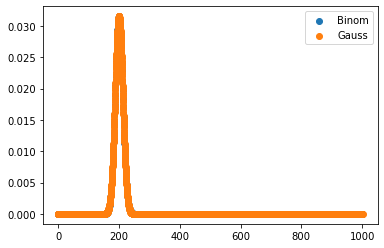

In [104]:
plt.scatter(x,dist,label="Binom")
x2 = np.linspace(0,1001,4000)
plt.scatter(x2,gauss(x2),label="Gauss")
plt.legend()

In [106]:
1/maximum

0.058063495043001

In [ ]:
def sample_binom2(n,p):
   ##TODO

## Questão 9 

Approximating the integral $\int_0^1e^{-x^2}dx$

In [ ]:
n = 1000000
exact = 0.746824
def method1(n):
    samples_x = np.random.uniform(0,1,n)
    samples_y = np.random.uniform(0,1,n)
    total = 0
    for x,y in zip(samples_x,samples_y):
        if y < np.exp(-x**2):
            total += 1
    return total/n

def generate_H(x):
    return np.e*np.exp(-x)/(np.e - 1)

def generate_H_inv(u):
    return -np.log(1 - u*(np.e-1)/np.e)

def method2(n):
    u = np.random.uniform(0,1,n)
    x = generate_H_inv(u)
    t = np.sum(np.exp(-x**2)/generate_H(x))
    return t/n

In [ ]:
y_1 = []
y_2 = []
fig,axs = plt.subplots(1,2,figsize=(16,8))
ns = [10**i for i in range(7)]
for n in ns:
    y_1.append(method1(n))
    y_2.append(method2(n))
axs[0].plot(ns,y_1,label="method 1")
axs[0].plot(ns,y_2,label="method 2")
axs[0].legend()
axs[0].set_title("Estimative of integral")
axs[1].plot(ns,np.abs([(y_1[i] - exact)/exact for i in range(len(y_1))]),label="method 1")
axs[1].plot(ns,np.abs([(y_2[i] - exact)/exact for i in range(len(y_1))]),label="method 2")
axs[1].legend()
axs[1].set_title("Errors")
axs[1].set_ylim(0,0.05)